In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from GD import GradientDescent, BatchGradientDescent, LogisticGradientDescent

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape

(442, 10)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, lr.predict(X_train))}")

lr.coef_, lr.intercept_

Train MSE: 2868.549702835577


(array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
        -931.48884588,  518.06227698,  163.41998299,  275.31790158,
         736.1988589 ,   48.67065743]),
 151.34560453985995)

In [3]:
from GD import GradientDescent, BatchGradientDescent, LogisticGradientDescent

gd_errors = []
def callback(model, w, epoch):
    if epoch%10 == 0:
        y_pred = model.predict(X)
        error = model._get_loss(y_pred, y)
        gd_errors.append(error)
        
gd = GradientDescent()
gd.fit(X, y, learning_rate=0.1, epochs=1000, verbose=0, callback=callback)

gd.weights

array([152.13348416,  40.44135357,  -5.70547015, 162.64742437,
       117.43463049,  38.68798773,  25.38081649, -99.84962411,
       100.07169142, 149.60227569,  92.17244242])

In [6]:
print(f"Train MSE: {mean_squared_error(y_train, gd.predict(X_train))}")

Train MSE: 4042.862261311777


In [7]:
bgd_errors = []
def callback(model, w, epoch, b):
    if epoch%10 == 0:
        y_pred = model.predict(X)
        error = model._get_loss(y_pred, y)
        bgd_errors.append(error)

bgd = BatchGradientDescent(batch_size=64, tol=0.0001)

bgd.fit(X, y, learning_rate=0.1, epochs=2000, verbose=0, callback=callback)

bgd.weights

array([ 152.18347117,   -2.53102548, -222.48373761,  513.27689329,
        315.35385509,  -52.48148679, -117.43277898, -208.73966897,
        122.96830257,  436.37751116,   97.8508299 ])

In [8]:
print(f"Train MSE: {mean_squared_error(y_train, bgd.predict(X_train))}")

Train MSE: 2914.521770824338


In [9]:
sgd_errors = []
def callback(model, w, epoch, b):
    if epoch%10 == 0:
        y_pred = model.predict(X)
        error = model._get_loss(y_pred, y)
        sgd_errors.append(error)

sgd = BatchGradientDescent(batch_size=1, tol=0.0001)

sgd.fit(X_train, y_train, learning_rate=0.1, epochs=2000, verbose=0, callback=callback)

sgd.weights

array([ 165.18742323,   10.94390853, -232.85976517,  545.19680087,
        371.38083167, -774.02106656,  441.39159092,  124.37172512,
        208.35382578,  699.89230048,   60.04184875])

In [10]:
print(f"Train MSE: {mean_squared_error(y_train, sgd.predict(X_train))}")

Train MSE: 3068.6180331138166


In [13]:
len(sgd_errors)

70600

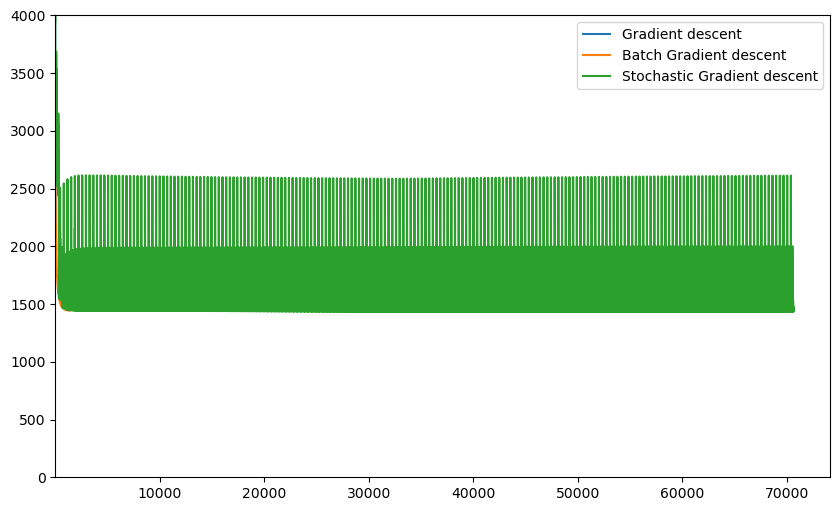

In [12]:
fig, ax = plt.subplots(figsize = (10, 6))
epochs = np.arange(1, 2001, 10)

ax.plot(gd_errors, label="Gradient descent")
ax.plot(bgd_errors, label="Batch Gradient descent")
ax.plot(sgd_errors, label="Stochastic Gradient descent")

plt.legend()
plt.xlim(10,)
plt.ylim(0,4000);

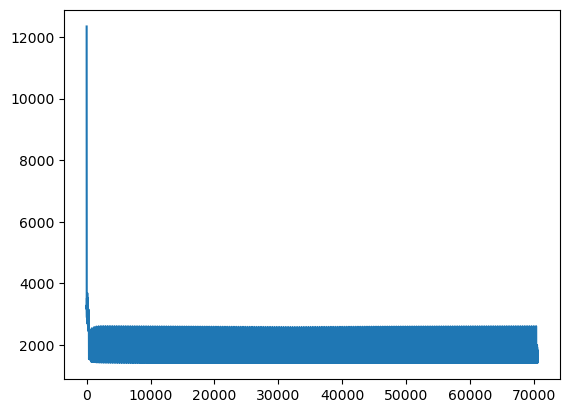

In [21]:
plt.plot(sgd_errors)

In [14]:
X, y = load_iris(return_X_y = True)

In [15]:
y = (y==1) | (y==0)
y = y.astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
logr = LogisticGradientDescent(tol=1e-6)

In [17]:
logr.fit(X, y, epochs=5000, verbose=0, learning_rate=0.1)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred = np.round(logr.predict(X))

In [20]:
accuracy_score(y, y_pred)

0.98

In [23]:
X = np.random.random((100, 10))

In [24]:
def create_batch(X, batch_size):
    idx = np.random.choice(X.shape[0], batch_size)
    yield X[idx]

In [27]:
for batch in create_batch(X, 10):
    print(batch.shape)

(10, 10)
